<a href="https://colab.research.google.com/github/thisntinge/E-Commerce-Public-Dataset-Analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Inge Najwa Aqiilah
- **Email:** inge.najwaa@student.uns.ac.id
- **ID Dicoding:** ingenajwa

## Menentukan Pertanyaan Bisnis

- Siapa seller yang telah mengeluarkan jumlah biaya terbanyak dalam ongkos pengiriman?
- Pembayaran jenis apa yang paling banyak digunakan dalam pemesanan order? Jika kartu kredit, berapa rata-rata cicilan yang diambil oleh customer?

## Import Semua Packages/Library yang Digunakan

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [91]:
order_items_dataset_df = pd.read_csv("https://raw.githubusercontent.com/thisntinge/E-Commerce-Public-Dataset-Analysis/refs/heads/main/data/order_items_dataset.csv")
order_items_dataset_df.head(7)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,5/23/2017 3:55,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,12/14/2017 12:10,19.90,11.85


In [92]:
order_payments_dataset_df = pd.read_csv("https://raw.githubusercontent.com/thisntinge/E-Commerce-Public-Dataset-Analysis/refs/heads/main/data/order_payments_dataset.csv")
order_payments_dataset_df.head(7)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16


**Insight:**
- Dataset tersebut menampilkan data dari sebuah e-commerce, terdapat data pemesanan order dari customer maupun data pengiriman yang dimiliki oleh seller.
- Penjelasan atribut dari data tersebut:
  - order_id : id dari sebuah order/pesanan yang masuk
  - order_item_id : id dari sebuah barang yang masuk pada pesanan
  - product_id : id dari produk
  - seller_id	: id seller/penjual
  - shipping_limit_date	: tanggal pengiriman pesanan
  - price	: harga total pesanan
  - freight_value : biaya jasa kirim pesanan
  - payment_sequential : urutan biaya pembayaran
  - payment_type : jenis pembayaran
  - payment_installments	: banyaknya jumlah cicilan pembayaran
  - payment_value : jumlah pembayaran

### Assessing Data

Menilai Data orders_items_dataset_df

In [93]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [94]:
order_items_dataset_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [95]:
print("Jumlah duplikasi: ", order_items_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [96]:
order_items_dataset_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menilai Data orders_payments_dataset_df

In [97]:
order_payments_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [98]:
order_payments_dataset_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [99]:
print("Jumlah duplikasi: ", order_payments_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [100]:
order_payments_dataset_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Melakukan assessing data untuk melihat apakah ada suatu kesalahan pada dataset tersebut.
- Kedua dataset tersebut tidak ditemukan duplikasi.

### Cleaning Data

Mengubah tipe data orders_items_dataset

In [101]:
order_items_dataset_df['shipping_limit_date'] = pd.to_datetime(order_items_dataset_df['shipping_limit_date'])

In [102]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Mengubah tipe data orders_payments_dataset

In [103]:
order_payments_dataset_df['payment_installments'] = pd.to_numeric(order_payments_dataset_df['payment_installments'])

In [104]:
order_payments_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- Dikarenakan tidak adanya suatu kesalahan pada dataset, maka pada tahap cleaning data ini hanya mengubah type data yang kurang tepat sebelumnya.

## Exploratory Data Analysis (EDA)

### Explore order_items_dataset

In [105]:
order_items_dataset_df.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
20364,2eadb8e36b6d6465dc9e2e3f3b95751d,1,a5ffaf53a3938ac2c92f493e524adfca,5d0363b33554b373851fc1622e4d5f3c,2018-01-30 15:18:00,45.90,26.67
64753,93ef5624aaaeded1aa197fd63116d902,1,366dbf5b3f67b090f640ae9573b757ee,8a432f4e5b471f8da497d7dc517666e2,2018-07-09 20:50:00,43.00,13.88
28992,41f5e3f5a534e0af91f17caed45b97db,1,593236d0ff46b4299b4787fb8d43f7f0,0dd184061fb0eaa7ca37932c68ab91c5,2018-03-29 11:28:00,79.00,18.63
43623,6325af88a0611fc357055cb87dcec11e,1,e53e557d5a159f5aa2c5e995dfdf244b,88460e8ebdecbfecb5f9601833981930,2018-07-31 02:42:00,77.90,22.48
4534,0a38b7de941db65679a11a300f782703,1,22a8168cf1f1c6347da8d29863b7f75e,2eb70248d66e0e3ef83659f71b244378,2018-02-21 10:55:00,415.90,10.17
60212,8938715999abb88950de2d1aa4b8f74d,2,16679d68bdbed3fb97af806424d7f2b7,9b013e03b2ab786505a1d3b5c0756754,2018-05-07 12:31:00,29.00,7.87
22499,3358a4c41e5feb5bb73829eb6cf42ba4,1,32e18e89237933ebdaaebd78a27e7fa1,ca3bd7cd9f149df75950150d010fe4a2,2017-10-11 16:14:00,26.18,17.60
72256,a4d541965fdf41f59fcbdd53630627b9,1,41587317a0dfddc726a29e86b9527f48,70a12e78e608ac31179aea7f8422044b,2017-03-14 04:10:00,59.00,12.01
65782,96656dd1c9f0e6b415561d8a6734ffef,1,d7252737cad49d030f9ce83b50249120,acce39e832338debb07b02385cde5967,2018-07-26 17:43:00,129.90,27.89
12941,1d5cf40416bcb8a9d98d2f759f9f1839,1,130482add9fd75ccb6c57ba007694a2d,87142160b41353c4e5fca2360caf6f92,2017-07-18 14:05:00,105.00,23.60


In [106]:
order_items_dataset_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:25.277763072,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:00,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:15,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:00,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:33:45,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:00,6735.000000,409.680000


In [107]:
order_items_dataset_df.groupby("seller_id").agg({
    "freight_value": "sum"
})

,freight_value
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,63.06
001cca7ae9ae17fb1caed9dfb1094831,8854.14
001e6ad469a905060d959994f1b41e4f,17.94
002100f778ceb8431b7a1020ff7ab48f,793.66
003554e2dce176b5555353e4f3555ac8,19.38
...,...
ffcfefa19b08742c5d315f2791395ee5,9.62
ffdd9f82b9a447f6f8d4b91554cc7dd3,727.46
ffeee66ac5d5a62fe688b9d26f83f534,419.69


In [108]:
order_items_dataset_df.groupby("seller_id").agg({
    "price": "sum"
})

,price
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,2685.00
001cca7ae9ae17fb1caed9dfb1094831,25080.03
001e6ad469a905060d959994f1b41e4f,250.00
002100f778ceb8431b7a1020ff7ab48f,1234.50
003554e2dce176b5555353e4f3555ac8,120.00
...,...
ffcfefa19b08742c5d315f2791395ee5,69.90
ffdd9f82b9a447f6f8d4b91554cc7dd3,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,1839.86


In [109]:
freight_cost_by_seller = order_items_dataset_df.groupby("seller_id").agg({
    "freight_value": "sum"
}).reset_index()

top_10_sellers = freight_cost_by_seller.sort_values(by="freight_value", ascending=False).head(10)

top_10_sellers

,seller_id,freight_value
1535,7c67e1448b00f6e969d365cea6b010ab,51612.55
368,1f50f920176fa81dab994f9023523100,35165.77
881,4a3ca9315b744ce9f8e9374361493884,35067.04
192,1025f0e2d44d7041d6cf58b6550e0bfa,33892.14
1954,a1043bafd471dff536d0c462352beb48,31844.09
1235,6560211a19b47992c3666cc44a7e94c0,27960.94
2481,cc419e0650a3c5ba77189a1882b7556a,25668.99
1824,955fee9216a65b617aa5c0531780ce60,25430.98
2643,da8622b14eb17ae2831f4ac5b9dab84a,24955.75
731,3d871de0142ce09b7081e2b9d1733cb1,22433.51


In [110]:
price_by_seller = order_items_dataset_df.groupby("seller_id").agg({
    "price": "sum"
}).reset_index()

top_10_sellers_by_price = price_by_seller.sort_values(by="price", ascending=False).head(10)

top_10_sellers_by_price

,seller_id,price
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1013,53243585a1d6dc2643021fd1853d8905,222776.05
881,4a3ca9315b744ce9f8e9374361493884,200472.92
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89
1560,7e93a43ef30c4f03f38b393420bc753a,176431.87
2643,da8622b14eb17ae2831f4ac5b9dab84a,160236.57
1505,7a67c85e85bb2ce8582c35f2203ad736,141745.53
192,1025f0e2d44d7041d6cf58b6550e0bfa,138968.55
1824,955fee9216a65b617aa5c0531780ce60,135171.70


In [111]:
highest_freight_seller = top_10_sellers.iloc[0]
seller_id = highest_freight_seller['seller_id']
freight_value = highest_freight_seller['freight_value']

print(f"\nKesimpulan: Seller dengan ID '{seller_id}' telah membayar ongkos kirim terbesar, yaitu sebesar {freight_value:.2f}.")


Kesimpulan: Seller dengan ID '7c67e1448b00f6e969d365cea6b010ab' telah membayar ongkos kirim terbesar, yaitu sebesar 51612.55.


### Explore order_payments_dataset

In [112]:
order_payments_dataset_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
5182,b203926285e72ba51c04c68b70666e32,1,boleto,1,125.75
47650,ff014de83d667807820e68d8ea975281,1,credit_card,1,35.11
9435,127f3dbf0dfc0da17005ba12e05d988c,1,boleto,1,519.22
17533,729a7bb44995146ae1829243068341ef,1,credit_card,1,61.06
51628,d591a97fad2791ee9d973b748fd1c4d9,1,credit_card,1,5.86
10286,ffae83c600bcc82f84437a9248825b80,1,credit_card,5,163.75
9446,0552997d7a7283a7761acc3a5f9bcefd,1,credit_card,1,37.09
10213,b8a4cbf978ddb7ef0264c480a122329f,1,credit_card,1,15.71
19155,db2dee8ce25524ad8374fa6d1b11849b,1,credit_card,1,65.95
49424,52b97b975715b37423f069909d441a50,1,credit_card,1,87.85


In [113]:
order_payments_dataset_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [114]:
payment_counts = order_payments_dataset_df.groupby("payment_type").agg({
    "payment_value": "count"
}).reset_index().rename(columns={"payment_value": "Total Customers"})

payment_counts

,payment_type,Total Customers
0,boleto,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


In [115]:
credit_card_payments = order_payments_dataset_df[order_payments_dataset_df['payment_type'] == 'credit_card']

average_installments = credit_card_payments['payment_installments'].mean()

print(f"Rata-rata cicilan yang diambil oleh customer ketika menggunakan kartu kredit adalah: {average_installments:.2f} kali")

Rata-rata cicilan yang diambil oleh customer ketika menggunakan kartu kredit adalah: 3.51 kali


**Insight:**
- Pada dataset order_items_dataset, didapat kesimpulan bahwa seller dengan ID '7c67e1448b00f6e969d365cea6b010ab' telah membayar ongkos kirim terbesar, yaitu sebesar 51612.55.
- Pada dataset order_items_dataset, didapat kesimpulan bahwa customer paling banyak membeli menggunakan kartu kredit. Dengan rata-rata cicilan yang diambil adalah: 3.51 kali.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Siapa seller yang telah mengeluarkan jumlah biaya terbanyak dalam ongkos pengiriman?

<ipython-input-116-5f73e3b7765f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="freight_value", y="seller_id", data=top_10_sellers, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

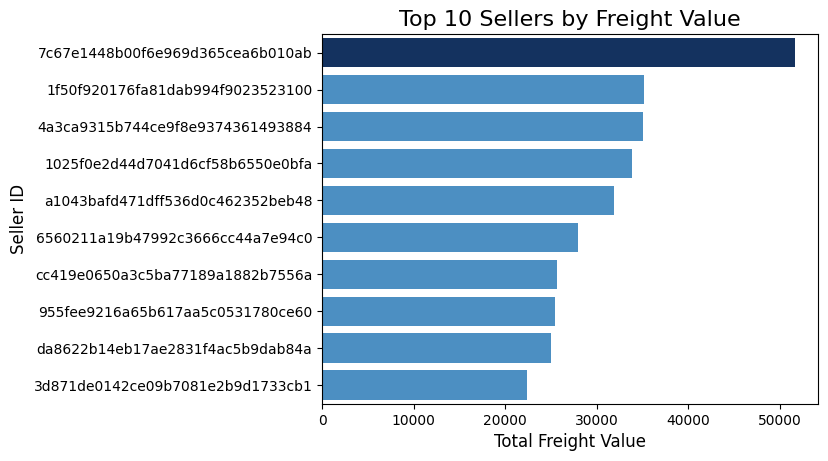

In [116]:
colors = ['#08306b'] + ['#3891d6'] * 9

sns.barplot(x="freight_value", y="seller_id", data=top_10_sellers, palette=colors)

plt.title("Top 10 Sellers by Freight Value", fontsize=16)
plt.xlabel("Total Freight Value", fontsize=12)
plt.ylabel("Seller ID", fontsize=12)

plt.show()

### Pertanyaan 2: Pembayaran jenis apa yang paling banyak digunakan dalam pemesanan order? Jika kartu kredit, berapa rata-rata cicilan yang diambil oleh customer?

<ipython-input-117-d794b364ee73>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_type", y="Total Customers", data=df_for_visualization, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarni

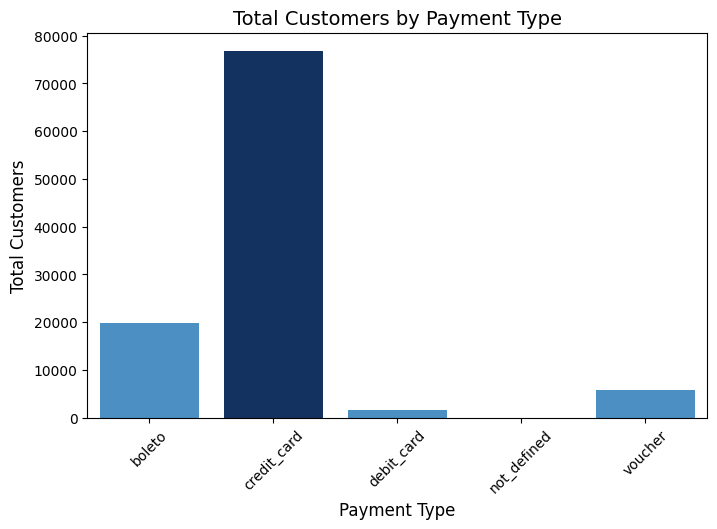

In [117]:
pivot_table = order_payments_dataset_df.groupby("payment_type").agg({
    "payment_type": "count"
}).rename(columns={"payment_type": "Total Customers"})

df_for_visualization = pivot_table.reset_index()

plt.figure(figsize=(8, 5))
colors = ['#08306b' if x == 'credit_card' else '#3891d6' for x in df_for_visualization['payment_type']]
sns.barplot(x="payment_type", y="Total Customers", data=df_for_visualization, palette=colors)

plt.title("Total Customers by Payment Type", fontsize=14)
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Total Customers", fontsize=12)
plt.xticks(rotation=45)

plt.show()

**Insight:**
- Visualisasi tersebut dapat membantu user untuk mendapatkan jawaban dari pertanyaan yang ada, dapat dilihat secara jelas untuk mengetahui nilai mana yang paling tinggi. Terdapat 2 warna yang membedakan antar grafik untuk memudahkan dalam melihat hasil.

## Analisis Lanjutan (Opsional)

## Conclusion

##Pertanyaan 1: Siapa seller yang telah mengeluarkan jumlah biaya terbanyak dalam ongkos pengiriman?
Seller dengan ID '7c67e1448b00f6e969d365cea6b010ab' telah membayar ongkos kirim terbesar, yaitu sebesar 51612.55.

##Pertanyaan 2: Pembayaran jenis apa yang paling banyak digunakan dalam pemesanan order? Jika kartu kredit, berapa rata-rata cicilan yang diambil oleh customer?
Customer paling banyak membeli menggunakan kartu kredit, dengan rata-rata cicilan yang diambil adalah: 3.51 kali.